# FashionMNIST using Neural Network

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" height='300' width='400' />

## Import dataset

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# keras imports for the dataset and building our neural network
from tensorflow import keras 
from keras import datasets, layers, models, losses
from keras.datasets import fashion_mnist

In [ ]:
# loads the dataset and divide into train and test
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# reshape dataset to have a single channel
#trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
#testX = X_test.reshape((X_test.shape[0], 28, 28, 1))

4422102/4422102 [==============================] - 0s 0us/step


## Explore the data

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(X_test.shape)
print(Y_test.shape)

(10000, 28, 28)
(10000,)


## Preprocess the data

The data must be preprocessed before training the network. 
If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

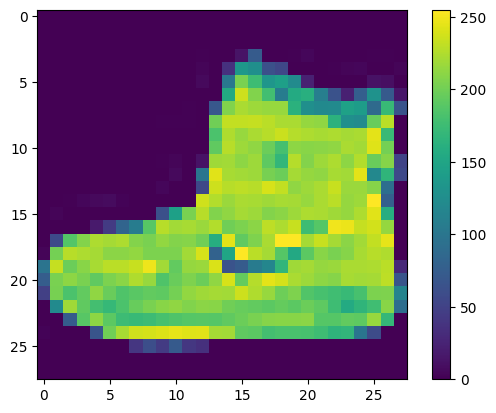

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model.
To do so, need to divide the values by 255. 
It's important that the training set and the testing set be preprocessed in the same way:

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, we display the first 15 images from the training set and display the class name below each image.

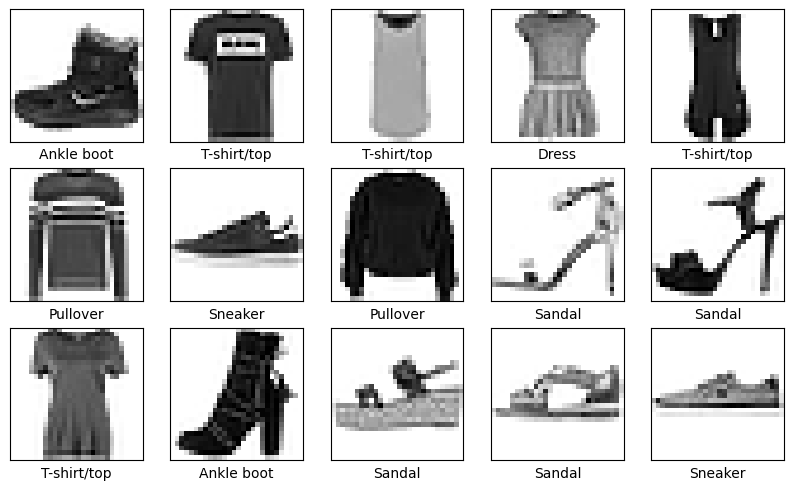

In [ ]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.
LeNet5 network:

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten , AveragePooling2D, BatchNormalization
from keras.optimizers import RMSprop,SGD,Adagrad,Adadelta,Adam,Adamax,Nadam
from keras.utils import np_utils
from keras.regularizers import l2

### LeNet5

In [ ]:
# LeNet5
model = Sequential()

#Layer 1- Conv Layer 
model.add(Conv2D(filters = 6, 
                  kernel_size = 5, 
                  strides = 1, 
                  activation = 'relu', 
                  input_shape = (28,28,1)))

#layer 2- Pooling layer 
model.add(MaxPooling2D(pool_size = 2, strides = 2))

#Layer 3- Conv Layer 
model.add(Conv2D(filters =16 , 
                  kernel_size = 5,
                  strides = 1,
                  activation = 'relu',
                  input_shape = (14,14,6)))

#layer 4- Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

#Flatten
model.add(Flatten())

#Layer 5- Fully connected layer
model.add(Dense(units = 120, activation = 'relu'))

#Layer 6- Fully connected layer 
model.add(Dense(units = 84, activation = 'relu'))

#Output Layer
model.add(Dense(units = 10, activation = 'softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 120)              

In [ ]:
#Train Model
history = model.fit(
    X_train, Y_train,
    batch_size=32,
    steps_per_epoch = 1500,
    epochs=10,
    verbose=1,
    validation_data=(X_test,Y_test))
LeNet5_df = pd.DataFrame(history.history)

Epoch 1/10
1500/1500 [==============================] - 33s 21ms/step - loss: 0.6103 - accuracy: 0.7760 - val_loss: 0.4475 - val_accuracy: 0.8380
Epoch 2/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.4125 - accuracy: 0.8494 - val_loss: 0.4204 - val_accuracy: 0.8488
Epoch 3/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3650 - accuracy: 0.8652 - val_loss: 0.4265 - val_accuracy: 0.8384
Epoch 4/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3336 - accuracy: 0.8763 - val_loss: 0.3519 - val_accuracy: 0.8698
Epoch 5/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.3184 - accuracy: 0.8821 - val_loss: 0.3394 - val_accuracy: 0.8740
Epoch 6/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2962 - accuracy: 0.8894 - val_loss: 0.3203 - val_accuracy: 0.8811
Epoch 7/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2762 - accuracy: 0.8964 - val_loss: 0.3186 -

<Axes: title={'center': 'LeNet5'}>

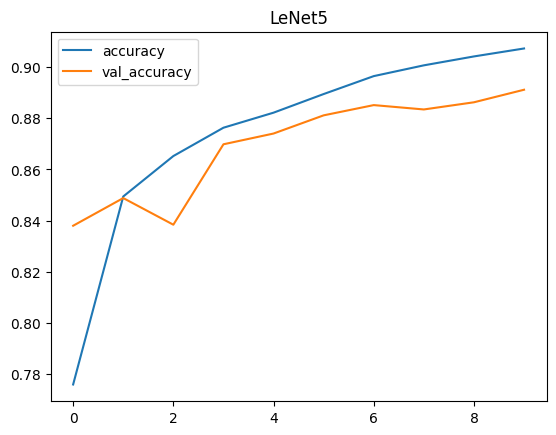

In [ ]:
LeNet5_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='LeNet5')

### LeNet5 With dropout

In [ ]:
# LeNet5_Dropout
model_Dropout = Sequential()

#Layer 1- Conv Layer 
model_Dropout.add(Conv2D(filters = 6, 
                  kernel_size = 5, 
                  strides = 1, 
                  activation = 'relu', 
                  input_shape = (28,28,1)))
model_Dropout.add(Dropout(0.2))

#layer 2- Pooling layer 
model_Dropout.add(MaxPooling2D(pool_size = 2, strides = 2))

#Layer 3- Conv Layer 
model_Dropout.add(Conv2D(filters =16 , 
                  kernel_size = 5,
                  strides = 1,
                  activation = 'relu',
                  input_shape = (14,14,6)))
model_Dropout.add(Dropout(0.2))

#layer 4- Pooling Layer 2
model_Dropout.add(MaxPooling2D(pool_size = 2, strides = 2))

#Flatten
model_Dropout.add(Flatten())

#Layer 5- Fully connected layer
model_Dropout.add(Dense(units = 120, activation = 'relu'))
model_Dropout.add(Dropout(0.2))

#Layer 6- Fully connected layer 
model_Dropout.add(Dense(units = 84, activation = 'relu'))
model_Dropout.add(Dropout(0.2)) 

#Output Layer
model_Dropout.add(Dense(units = 10, activation = 'softmax'))

model_Dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_Dropout.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 dropout (Dropout)           (None, 24, 24, 6)         0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                 

In [ ]:
#Train Model
history = model_Dropout.fit(
    X_train, Y_train,
    batch_size=32,
    steps_per_epoch = 1500,
    epochs=10,
    verbose=1,
    validation_data=(X_test,Y_test))
LeNet5_dropout_df = pd.DataFrame(history.history)

Epoch 1/10
1500/1500 [==============================] - 40s 26ms/step - loss: 0.6540 - accuracy: 0.7602 - val_loss: 0.4818 - val_accuracy: 0.8351
Epoch 2/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.4480 - accuracy: 0.8377 - val_loss: 0.4272 - val_accuracy: 0.8502
Epoch 3/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3936 - accuracy: 0.8551 - val_loss: 0.3738 - val_accuracy: 0.8713
Epoch 4/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3714 - accuracy: 0.8634 - val_loss: 0.3497 - val_accuracy: 0.8786
Epoch 5/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.3495 - accuracy: 0.8717 - val_loss: 0.3340 - val_accuracy: 0.8773
Epoch 6/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3394 - accuracy: 0.8751 - val_loss: 0.3299 - val_accuracy: 0.8807
Epoch 7/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.3236 - accuracy: 0.8804 - val_loss: 0.3164 -

<Axes: title={'center': 'LeNet5 with dropout'}>

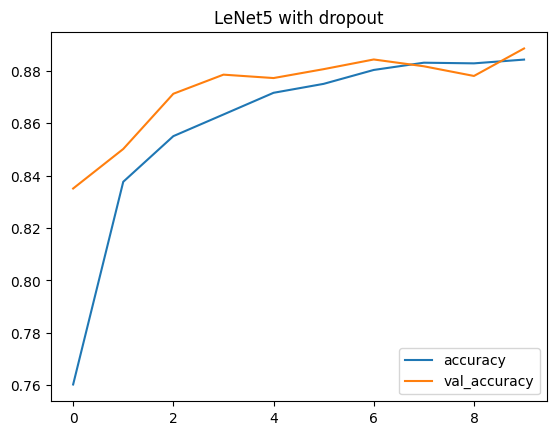

In [ ]:
LeNet5_dropout_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='LeNet5 with dropout')

### LeNet5 with Weight Decay

In [ ]:
# LeNet5_Weight_Decay
model_WD = Sequential()

#Layer 1- Conv Layer 
model_WD.add(Conv2D(filters = 6, 
                  kernel_size = 5, 
                  strides = 1, 
                  activation = 'relu', 
                  input_shape = (28,28,1)))

#layer 2- Pooling layer 
model_WD.add(MaxPooling2D(pool_size = 2, strides = 2))

#Layer 3- Conv Layer 
model_WD.add(Conv2D(filters =16 , 
                  kernel_size = 5,
                  strides = 1,
                  activation = 'relu',
                  input_shape = (14,14,6)))

#layer 4- Pooling Layer 2
model_WD.add(MaxPooling2D(pool_size = 2, strides = 2))

#Flatten
model_WD.add(Flatten())

#Layer 5- Fully connected layer
model_WD.add(Dense(units = 120, activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01)))

#Layer 6- Fully connected layer 
model_WD.add(Dense(units = 84, activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01)))

#Output Layer
model_WD.add(Dense(units = 10, activation = 'softmax'))
 

model_WD.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_WD.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [ ]:
#Train Model
history = model_WD.fit(
    X_train, Y_train,
    batch_size=32,
    steps_per_epoch = 1500,
    epochs=10,
    verbose=1,
    validation_data=(X_test,Y_test))
LeNet5_Weight_Decay_df = pd.DataFrame(history.history)

Epoch 1/10
1500/1500 [==============================] - 33s 21ms/step - loss: 0.7467 - accuracy: 0.7708 - val_loss: 0.5689 - val_accuracy: 0.8339
Epoch 2/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.5211 - accuracy: 0.8467 - val_loss: 0.5061 - val_accuracy: 0.8489
Epoch 3/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.4569 - accuracy: 0.8621 - val_loss: 0.4746 - val_accuracy: 0.8561
Epoch 4/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.4332 - accuracy: 0.8686 - val_loss: 0.4395 - val_accuracy: 0.8608
Epoch 5/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.4068 - accuracy: 0.8746 - val_loss: 0.4126 - val_accuracy: 0.8727
Epoch 6/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3884 - accuracy: 0.8817 - val_loss: 0.4099 - val_accuracy: 0.8711
Epoch 7/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.3719 - accuracy: 0.8842 - val_loss: 0.4091 -

<Axes: title={'center': 'LeNet5 with Weight_Decay'}>

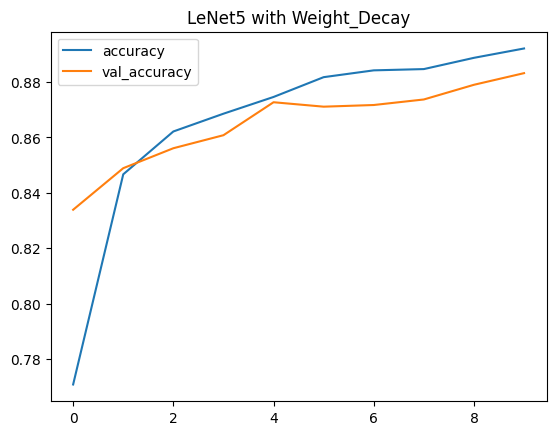

In [ ]:
LeNet5_Weight_Decay_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='LeNet5 with Weight_Decay')

### LeNet5 with Batch Normalization

In [ ]:
# LeNet5_Batch_Normalization
model_BN = Sequential()

#Layer 1- Conv Layer 
model_BN.add(Conv2D(filters = 6, 
                  kernel_size = 5, 
                  strides = 1, 
                  activation = 'relu', 
                  input_shape = (28,28,1)))
model_BN.add(BatchNormalization())

#layer 2- Pooling layer 
model_BN.add(MaxPooling2D(pool_size = 2, strides = 2))

#Layer 3- Conv Layer 
model_BN.add(Conv2D(filters =16 , 
                  kernel_size = 5,
                  strides = 1,
                  activation = 'relu',
                  input_shape = (14,14,6)))
model_BN.add(BatchNormalization())

#layer 4- Pooling Layer 2
model_BN.add(MaxPooling2D(pool_size = 2, strides = 2))

#Flatten
model_BN.add(Flatten())

#Layer 5- Fully connected layer
model_BN.add(Dense(units = 120, activation = 'relu'))
model_BN.add(BatchNormalization())

#Layer 6- Fully connected layer 
model_BN.add(Dense(units = 84, activation = 'relu'))
model_BN.add(BatchNormalization())

#Output Layer
model_BN.add(Dense(units = 10, activation = 'softmax'))

model_BN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_BN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 6)        24        
 ormalization)                                                   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 16)         64        
 hNormalization)                                                 
                                                      

In [ ]:
#Train Model
history = model_WD.fit(
    X_train, Y_train,
    batch_size=32,
    steps_per_epoch = 1500,
    epochs=10,
    verbose=1,
    validation_data=(X_test,Y_test))
LeNet5_Batch_Normalizationy_df = pd.DataFrame(history.history)

Epoch 1/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3390 - accuracy: 0.8950 - val_loss: 0.3673 - val_accuracy: 0.8859
Epoch 2/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3327 - accuracy: 0.8970 - val_loss: 0.3550 - val_accuracy: 0.8891
Epoch 3/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3240 - accuracy: 0.8990 - val_loss: 0.3764 - val_accuracy: 0.8786
Epoch 4/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3230 - accuracy: 0.8996 - val_loss: 0.3639 - val_accuracy: 0.8841
Epoch 5/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3178 - accuracy: 0.9014 - val_loss: 0.3521 - val_accuracy: 0.8916
Epoch 6/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.3102 - accuracy: 0.9035 - val_loss: 0.3516 - val_accuracy: 0.8895
Epoch 7/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3093 - accuracy: 0.9037 - val_loss: 0.3494 -

<Axes: title={'center': 'LeNet5 with Batch Normalizationy'}>

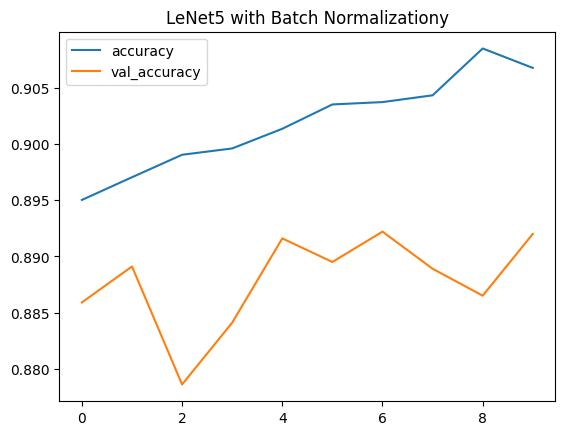

In [ ]:
LeNet5_Batch_Normalizationy_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='LeNet5 with Batch Normalizationy')

## Summary

In [ ]:
Summary_df=pd.DataFrame({'Type_LeNet5':['LeNet5','Dropout','Weight Decay','Batch Normalization'],
                   'accuracy':[LeNet5_df['accuracy'][9],LeNet5_dropout_df['accuracy'][9],LeNet5_Weight_Decay_df['accuracy'][9],LeNet5_Batch_Normalizationy_df['accuracy'][9]],
                   'val_accuracy':[LeNet5_df['val_accuracy'][9],LeNet5_dropout_df['val_accuracy'][9],LeNet5_Weight_Decay_df['val_accuracy'][9],LeNet5_Batch_Normalizationy_df['val_accuracy'][9]]})

In [ ]:
Summary_df

,Type_LeNet5,accuracy,val_accuracy
0,LeNet5,0.907208,0.8911
1,Dropout,0.884354,0.8886
2,Weight Decay,0.892104,0.8832
3,Batch Normalization,0.906771,0.8920


####Deep Learning, TAU, 0510-7255 EX 1 Practical readme #######
Hay Lahav 308279918 
Nadav Marciano 305165698
